In [1]:
#Give some analysis on the relationship 
#between the economical events and variables and their impacts on the daily number of visitors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
data=pd.read_csv("C:/Users/Asus/Desktop/economic_variables.csv")

In [4]:
data.head()

,pk,date,hour,bist100,usdtry,eurtry,eurusd,faiz,xau,brent,bky
0,3,2021-04-28,17,1388.59,8.2159,9.9379,1.2096,18.08,1773.86,67.33,NaN
1,4,2021-04-29,10,1398.85,8.1710,9.9166,1.2120,18.08,1780.19,67.54,NaN
2,5,2021-04-30,9,1401.52,8.2281,9.9741,1.2117,18.08,1769.11,68.08,NaN
3,6,2021-05-03,19,1421.15,8.2649,9.9694,1.2056,17.94,1793.31,67.45,NaN
4,7,2021-05-04,10,1421.15,8.2888,9.9721,1.2027,17.94,1785.86,67.43,NaN


In [5]:
data2=pd.read_csv("C:/Users/Asus/Desktop/economic_calendar.csv")

In [6]:
data2.head()

,pk,date,time,country,indicator,priority,explained,expectation,previous
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1,NaN,NaN,"1,770MLN"
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1,NaN,NaN,"%0,5"
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1,NaN,NaN,"%42,7"
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1,NaN,NaN,"%78,0"
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1,NaN,NaN,2.855


In [7]:
data4=pd.read_csv("C:/Users/Asus/Desktop/transactions.csv")

In [8]:
data4.head()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020082900,Product D,Facebook,1
1,146288071,2_50414542,2020082900,Product D,Organic search,1
2,146287503,2_50413935,2020082900,Product D,Organic search,1
3,146287504,2_50413936,2020082900,Product D,Organic search,1
4,146296436,3_65496155,2020082900,Product E,Google Ads,1


In [9]:
#lets have a look at economic variables dataset and clean it.

In [10]:
data.head()

,pk,date,hour,bist100,usdtry,eurtry,eurusd,faiz,xau,brent,bky
0,3,2021-04-28,17,1388.59,8.2159,9.9379,1.2096,18.08,1773.86,67.33,NaN
1,4,2021-04-29,10,1398.85,8.1710,9.9166,1.2120,18.08,1780.19,67.54,NaN
2,5,2021-04-30,9,1401.52,8.2281,9.9741,1.2117,18.08,1769.11,68.08,NaN
3,6,2021-05-03,19,1421.15,8.2649,9.9694,1.2056,17.94,1793.31,67.45,NaN
4,7,2021-05-04,10,1421.15,8.2888,9.9721,1.2027,17.94,1785.86,67.43,NaN


In [11]:
data.isna().sum()

pk           0
date         0
hour         0
bist100      0
usdtry       0
eurtry       0
eurusd       0
faiz         0
xau          0
brent        0
bky        416
dtype: int64

In [12]:
data[data["bky"].isna()==True].nunique().sum()

2231

In [13]:
#SHOULD WE DROP OR REPLACE İT?

In [14]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print(' it is ',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  416
 it is  67 percent of the entire dataset the rows with missing values are excluded.


In [15]:
# there are %67(too much) missing data in bky columns, ı dropped the column. 

In [16]:
data.drop(columns="bky",axis=1,inplace=True)

In [17]:
data.head()

,pk,date,hour,bist100,usdtry,eurtry,eurusd,faiz,xau,brent
0,3,2021-04-28,17,1388.59,8.2159,9.9379,1.2096,18.08,1773.86,67.33
1,4,2021-04-29,10,1398.85,8.1710,9.9166,1.2120,18.08,1780.19,67.54
2,5,2021-04-30,9,1401.52,8.2281,9.9741,1.2117,18.08,1769.11,68.08
3,6,2021-05-03,19,1421.15,8.2649,9.9694,1.2056,17.94,1793.31,67.45
4,7,2021-05-04,10,1421.15,8.2888,9.9721,1.2027,17.94,1785.86,67.43


In [18]:
#there is no nan values,they all numeric values. Lets discovery the data.

In [19]:
data.describe()

,pk,hour,bist100,usdtry,eurtry,eurusd,faiz,xau,brent
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,314.833333,13.508013,1414.302788,8.591976,10.211052,1.188144,18.428574,1805.707788,73.617260
std,180.662979,3.362039,33.736424,0.210558,0.200258,0.019204,0.381023,44.887453,4.275871
min,3.000000,9.000000,1344.540000,8.171000,9.799900,1.154000,17.680000,1725.820000,65.110000
25%,158.750000,10.000000,1391.050000,8.443750,10.068100,1.176300,18.180000,1767.620000,70.700000
50%,314.500000,15.000000,1416.320000,8.569500,10.233300,1.184200,18.410000,1800.495000,73.280000
75%,471.250000,17.250000,1441.330000,8.691425,10.350675,1.205375,18.730000,1827.382500,75.550000
max,627.000000,19.000000,1481.930000,9.275500,10.758500,1.225900,19.100000,1912.610000,85.670000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pk       624 non-null    int64  
 1   date     624 non-null    object 
 2   hour     624 non-null    int64  
 3   bist100  624 non-null    float64
 4   usdtry   624 non-null    float64
 5   eurtry   624 non-null    float64
 6   eurusd   624 non-null    float64
 7   faiz     624 non-null    float64
 8   xau      624 non-null    float64
 9   brent    624 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 48.9+ KB


In [21]:
# there is time column, so ı want to transform it to the datetime.

In [22]:
data["date"]=pd.to_datetime(data["date"])

In [23]:
data.date

0     2021-04-28
1     2021-04-29
2     2021-04-30
3     2021-05-03
4     2021-05-04
         ...    
619   2021-10-17
620   2021-10-17
621   2021-10-17
622   2021-10-17
623   2021-10-18
Name: date, Length: 624, dtype: datetime64[ns]

In [24]:
data.head()

,pk,date,hour,bist100,usdtry,eurtry,eurusd,faiz,xau,brent
0,3,2021-04-28,17,1388.59,8.2159,9.9379,1.2096,18.08,1773.86,67.33
1,4,2021-04-29,10,1398.85,8.1710,9.9166,1.2120,18.08,1780.19,67.54
2,5,2021-04-30,9,1401.52,8.2281,9.9741,1.2117,18.08,1769.11,68.08
3,6,2021-05-03,19,1421.15,8.2649,9.9694,1.2056,17.94,1793.31,67.45
4,7,2021-05-04,10,1421.15,8.2888,9.9721,1.2027,17.94,1785.86,67.43


In [25]:
# Now lets look at economic events dataset which is data2 in here.

In [26]:
data2.head()

,pk,date,time,country,indicator,priority,explained,expectation,previous
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1,NaN,NaN,"1,770MLN"
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1,NaN,NaN,"%0,5"
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1,NaN,NaN,"%42,7"
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1,NaN,NaN,"%78,0"
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1,NaN,NaN,2.855


In [27]:
#discovering the data2

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27260 entries, 0 to 27259
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pk           27260 non-null  int64 
 1   date         27260 non-null  object
 2   time         27260 non-null  object
 3   country      27260 non-null  object
 4   indicator    27260 non-null  object
 5   priority     27260 non-null  int64 
 6   explained    2638 non-null   object
 7   expectation  1805 non-null   object
 8   previous     26709 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.9+ MB


In [29]:
data2.isna().sum()

pk                 0
date               0
time               0
country            0
indicator          0
priority           0
explained      24622
expectation    25455
previous         551
dtype: int64

In [30]:
#lets calculate  percentage of missing values for explained, expectation, and previous columns.

In [31]:
explained_per=((data2.explained.isna().sum())/len(data2.explained))*100
explained_per

90.32281731474689

In [32]:
expectation_per=((data2.expectation.isna().sum())/len(data2.expectation))*100
expectation_per

93.37857666911226

In [33]:
previous_per=((data2.previous.isna().sum())/len(data2.previous))*100
previous_per

2.021276595744681

In [34]:
#because the percentage of missing values are so high, ı dropped them.

In [35]:
data2.drop(columns="explained",axis=1,inplace=True)
data2.drop(columns="expectation",axis=1,inplace=True)


In [36]:
data2.head()

,pk,date,time,country,indicator,priority,previous
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1,"1,770MLN"
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1,"%0,5"
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1,"%42,7"
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1,"%78,0"
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1,2.855


In [37]:
data2.drop(columns="previous",axis=1,inplace=True)

In [38]:
data2.head()

,pk,date,time,country,indicator,priority
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1


In [39]:
data2.priority[data2.country=="Türkiye"]

14       1
15       1
16       1
17       1
18       1
        ..
27253    1
27254    1
27255    1
27256    1
27257    1
Name: priority, Length: 5168, dtype: int64

In [40]:
#so ı would like to convert objects to correct type.

In [41]:
data2["date"]=pd.to_datetime(data2["date"])

In [42]:
#cleaning the data

In [43]:
data2.isna().sum()

pk           0
date         0
time         0
country      0
indicator    0
priority     0
dtype: int64

In [44]:
# ı will get the indicator column and merge with the varibales of data. first groupby the data2 by time

In [45]:
data2["Grouped"]=data2.groupby("date")["indicator"].transform(lambda x: ",".join(x))

In [46]:
data2


,pk,date,time,country,indicator,priority,Grouped
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf..."
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf..."
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf..."
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf..."
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf..."
...,...,...,...,...,...,...,...
27255,27548,2021-10-16,11:00,Türkiye,MKK'da Saklanan Yatırım Fonu(TL),1,"Tüketici Fiyat Endeksi(Aylık),Tüketici Fiyat E..."
27256,27549,2021-10-16,11:00,Türkiye,MKK'da Saklanan Pay Senedi(TL),1,"Tüketici Fiyat Endeksi(Aylık),Tüketici Fiyat E..."
27257,27550,2021-10-16,11:00,Türkiye,MKK'da Saklanan Özel Sektör Borçlanma Aracı(TL),1,"Tüketici Fiyat Endeksi(Aylık),Tüketici Fiyat E..."
27258,27551,2021-10-17,14:00,İsrail,GSYH(Final),3,"GSYH(Final),GSYH(Final-Yıllık)"


<AxesSubplot:title={'center':'hour'}, xlabel='time', ylabel='count'>

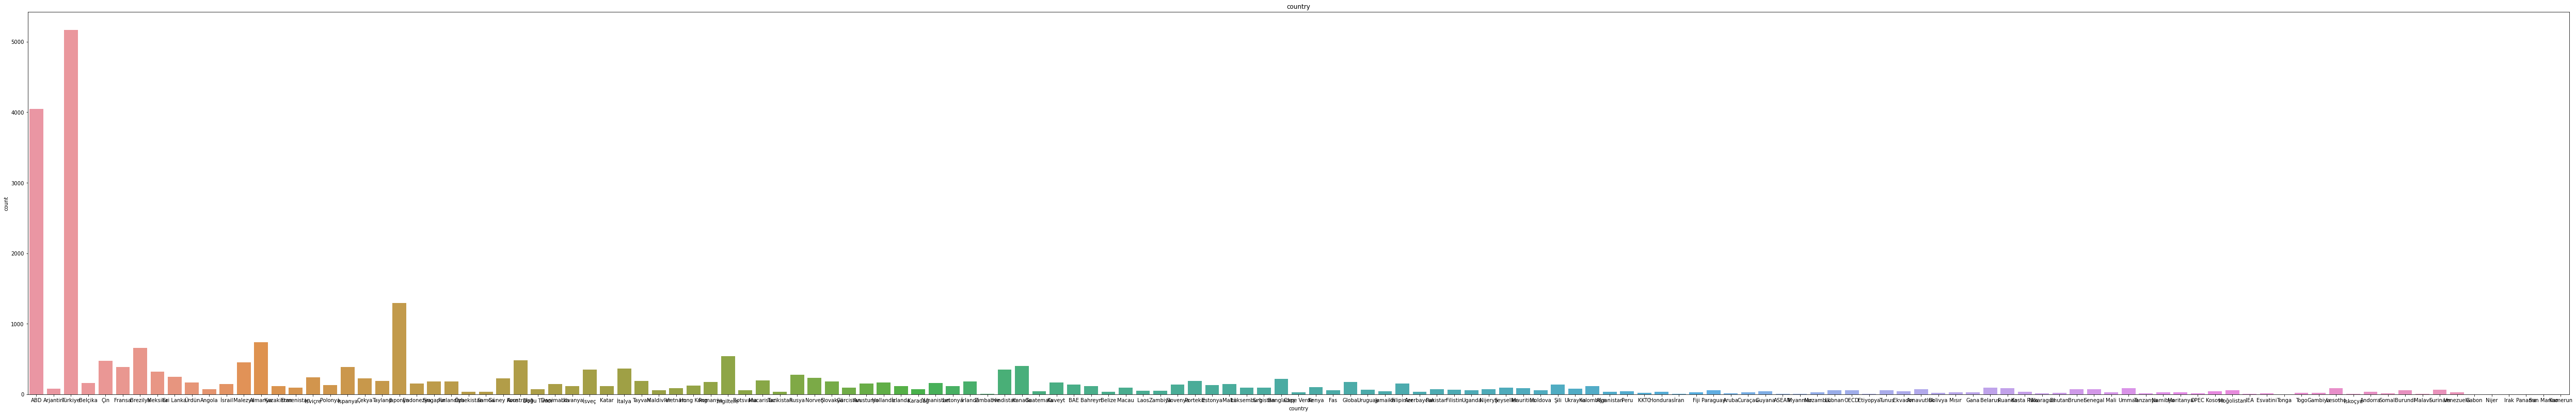

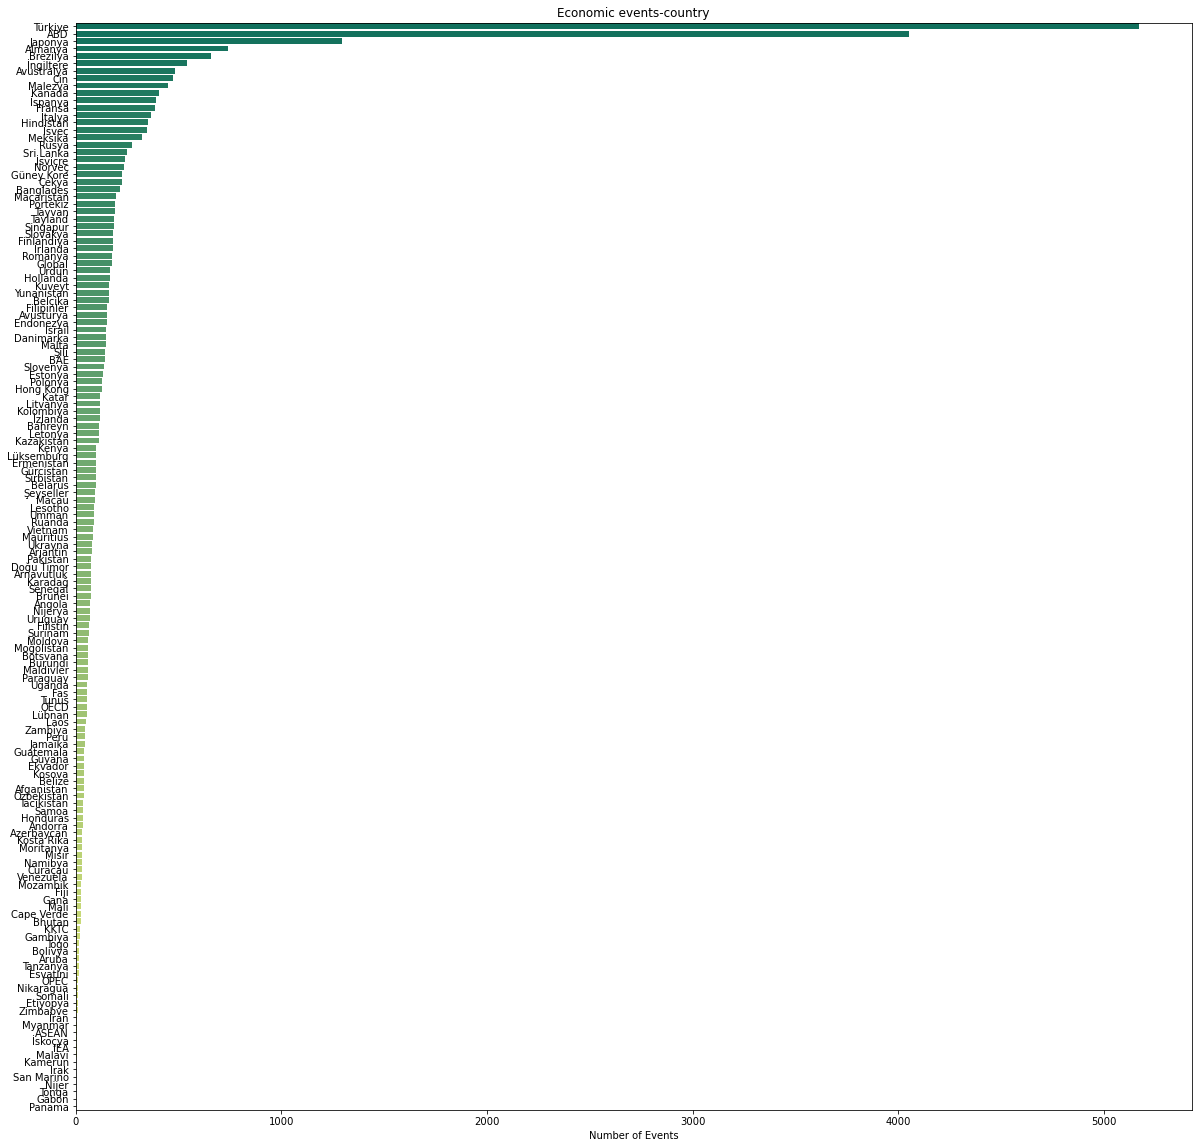

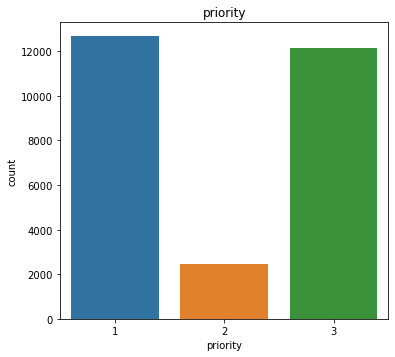

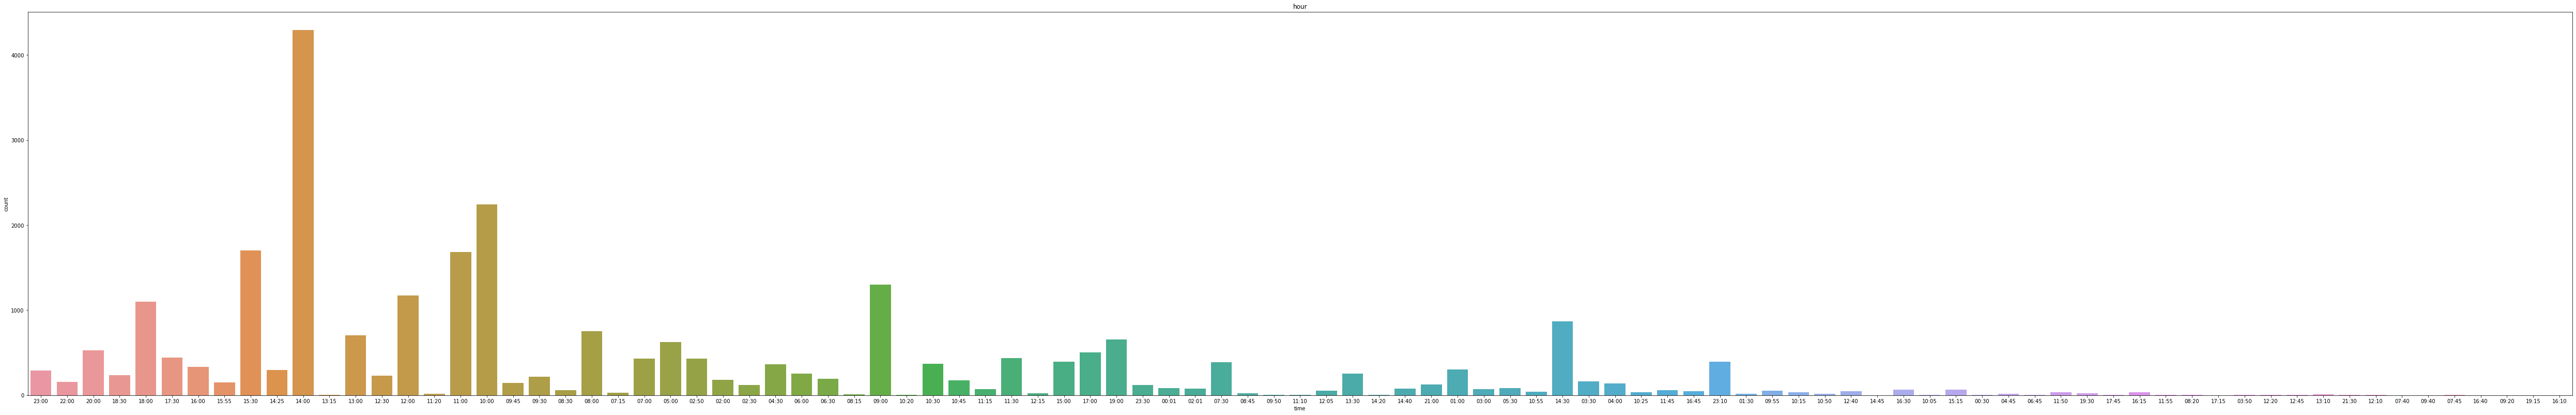

In [47]:
fig = plt.figure(figsize=(300,30))

plt.subplot(2,3,1)
plt.title('country')
sns.countplot(data2.country)
# The visitors are mostly from TURKEY and ABD.

plt.figure(figsize=(20,20))
sns.barplot(y = data2['country'].value_counts().index, x = data2['country'].value_counts(), palette = 'summer')
plt.title("Economic events-country")
plt.xlabel('Number of Events')


fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title('priority')
sns.countplot(data2.priority)
# first priority and third priority are mostly relative to the second.

fig = plt.figure(figsize=(300,30))

plt.subplot(2,3,1)
plt.title('hour')
sns.countplot(data2.time)
# mostly at 14:00, visitors are came.




<AxesSubplot:title={'center':'indicators'}, xlabel='indicator', ylabel='count'>

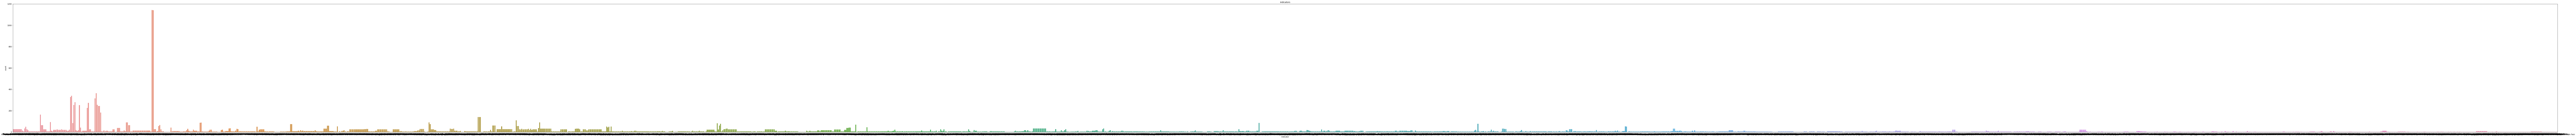

In [48]:
fig = plt.figure(figsize=(900,30))

plt.subplot(2,3,1)
plt.title('indicators')
plt.xlabel("a")
sns.countplot(data2.indicator)


In [49]:
data2.indicator.value_counts()

Tüketici Fiyat Endeksi(Aylık)                      1143
Tüketici Fiyat Endeksi(Yıllık)                     1141
Sanayi Üretimi(Yıllık)                              364
Üretici Fiyat Endeksi(Yıllık)                       340
İşsizlik Oranı                                      329
                                                   ... 
Bankacılık Sektörü Net Kar/Zararı(Ocak-Haziran)       1
23 Yıllık OAT Yeşil Tahvil İhale Faizi                1
8 Yıllık OAT Tahvil İhale Faizi                       1
IPC-BR Endeksi(Aylık)                                 1
1 Yıllık Altına Dayalı Kira Sertifikası(Kg)           1
Name: indicator, Length: 2278, dtype: int64

In [50]:
# As you see the above, most ocurred events are Tüketici Fiyat Endeksi for month and year.

In [51]:
#  one hot encoding  to Country column(Turkey ve ABD) ve priority column.

In [52]:
dummy_country=pd.get_dummies(data2,columns=["country"])

In [53]:
data2=dummy_country

In [54]:
data2=pd.get_dummies(data2,columns=["priority"])

In [55]:
data2.head()

,pk,date,time,indicator,Grouped,country_ABD,country_ASEAN,country_Afganistan,country_Almanya,country_Andorra,...,country_İsrail,country_İsveç,country_İsviçre,country_İtalya,country_İzlanda,country_Şeyseller,country_Şili,priority_1,priority_2,priority_3
0,1,2021-04-26,23:00,AISI Çelik Üretimi(Ton),"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,2021-04-26,23:00,AISI Çelik Üretimi(Haftalık),"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,2021-04-26,23:00,AISI Çelik Üretimi(Yıllık),"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2021-04-26,23:00,AISI Çelik Üretimi Kapasite Kullanımı,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2021-04-26,23:00,Perakende Benzin Fiyatları($/Galon),"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
# groupby with date.

In [57]:
data2=data2.drop(columns=["pk","time","indicator"],axis=1)

In [58]:
data2.head()

,date,Grouped,country_ABD,country_ASEAN,country_Afganistan,country_Almanya,country_Andorra,country_Angola,country_Arjantin,country_Arnavutluk,...,country_İsrail,country_İsveç,country_İsviçre,country_İtalya,country_İzlanda,country_Şeyseller,country_Şili,priority_1,priority_2,priority_3
0,2021-04-26,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2021-04-26,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2021-04-26,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2021-04-26,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2021-04-26,"AISI Çelik Üretimi(Ton),AISI Çelik Üretimi(Haf...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
data2_grouped= data2.groupby(data2.date).sum()
    
    
    

In [60]:
data2_grouped

,country_ABD,country_ASEAN,country_Afganistan,country_Almanya,country_Andorra,country_Angola,country_Arjantin,country_Arnavutluk,country_Aruba,country_Avustralya,...,country_İsrail,country_İsveç,country_İsviçre,country_İtalya,country_İzlanda,country_Şeyseller,country_Şili,priority_1,priority_2,priority_3
date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,17,0,0,4,0,2,2,0,0,0,...,3,0,2,0,0,0,0,81,18,47
2021-04-28,72,0,0,11,0,0,0,0,0,7,...,0,16,1,17,1,0,0,149,37,108
2021-04-29,48,0,0,29,0,2,1,0,0,2,...,0,10,0,4,4,0,0,106,48,119
2021-04-30,30,0,0,5,0,2,0,0,0,12,...,0,0,3,9,2,7,7,158,41,189
2021-05-03,23,0,2,4,0,0,0,0,0,9,...,0,1,3,2,0,0,0,63,8,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-13,36,0,0,5,0,4,0,0,0,2,...,5,0,0,3,0,0,0,88,17,77
2021-10-14,59,0,0,0,0,0,2,0,0,6,...,1,6,6,0,0,0,1,116,34,107
2021-10-15,53,0,0,4,5,0,0,0,0,0,...,2,2,0,16,2,0,0,151,47,144


In [61]:
a=[]
for i in data2_grouped.columns:
    if "country" in i:
            a.append(i)
d=[]
for i in a:
    if i!="country_Türkiye" and i!="country_ABD":
        d.append(i)
d
        
            

['country_ASEAN',
 'country_Afganistan',
 'country_Almanya',
 'country_Andorra',
 'country_Angola',
 'country_Arjantin',
 'country_Arnavutluk',
 'country_Aruba',
 'country_Avustralya',
 'country_Avusturya',
 'country_Azerbaycan',
 'country_BAE',
 'country_Bahreyn',
 'country_Bangladeş',
 'country_Belarus',
 'country_Belize',
 'country_Belçika',
 'country_Bhutan',
 'country_Bolivya',
 'country_Botsvana',
 'country_Brezilya',
 'country_Brunei',
 'country_Burundi',
 'country_Cape Verde',
 'country_Curaçau',
 'country_Danimarka',
 'country_Doğu Timor',
 'country_Ekvador',
 'country_Endonezya',
 'country_Ermenistan',
 'country_Estonya',
 'country_Esvatini',
 'country_Etiyopya',
 'country_Fas',
 'country_Fiji',
 'country_Filipinler',
 'country_Filistin',
 'country_Finlandiya',
 'country_Fransa',
 'country_Gabon',
 'country_Gambiya',
 'country_Gana',
 'country_Global',
 'country_Guatemala',
 'country_Guyana',
 'country_Güney Kore',
 'country_Gürcistan',
 'country_Hindistan',
 'country_Holland

In [62]:
data2_grouped.drop(columns=d,axis=1,inplace=True)

In [63]:
data2_grouped.isna().sum()

country_ABD        0
country_Türkiye    0
priority_1         0
priority_2         0
priority_3         0
dtype: int64

In [64]:
#Now it is prepared to join the final dataset. I will join this data in following steps but now, handling with data3.

In [65]:
#lets lokk at the transaction data as data3.

In [66]:
data3=pd.read_csv("C:/Users/Asus/Desktop/transactions.csv")

In [67]:
data3.tail()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
20831804,226498706,11_2530064,2021101807,Product D,Google Ads,1
20831805,226498707,11_2530066,2021101807,Product D,Facebook,1
20831806,226498708,11_2530068,2021101807,Product D,Google Ads,1
20831807,226498709,11_2530070,2021101807,Product D,NaN,1
20831808,226498710,11_2530071,2021101807,Product D,Facebook,1


In [68]:
data3.isna().sum()

pk                        0
ga_transactionid          0
ga_datehour               0
ga_products               0
ga_channels         2071467
ga_itemquantity           0
dtype: int64

In [69]:
a=data3.index[data3.ga_channels.isna()==True]

In [70]:
data3.drop(a,axis=0,inplace=True)

In [71]:
data3.isna().sum()

pk                  0
ga_transactionid    0
ga_datehour         0
ga_products         0
ga_channels         0
ga_itemquantity     0
dtype: int64

In [72]:
#ı cleaned the na values by dropping them.I do not prefer to fiil cause it is categoric values.

In [73]:
#lets covert the time to datetime.

In [74]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18760342 entries, 0 to 20831808
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   pk                int64 
 1   ga_transactionid  object
 2   ga_datehour       int64 
 3   ga_products       object
 4   ga_channels       object
 5   ga_itemquantity   int64 
dtypes: int64(3), object(3)
memory usage: 1001.9+ MB


In [75]:
data3['ga_datehour'] = data3['ga_datehour'].astype(str)

In [76]:
#lets first do them string.

In [77]:
#seperated hour part made different column.

In [78]:
data3["datetime"]=data3["ga_datehour"].str[0:8]

In [79]:
data3.head()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity,datetime
0,146288072,2_50414543,2020082900,Product D,Facebook,1,20200829
1,146288071,2_50414542,2020082900,Product D,Organic search,1,20200829
2,146287503,2_50413935,2020082900,Product D,Organic search,1,20200829
3,146287504,2_50413936,2020082900,Product D,Organic search,1,20200829
4,146296436,3_65496155,2020082900,Product E,Google Ads,1,20200829


In [80]:
time=[]
data3=data3.reset_index()
for i in data3.datetime:
    k=i[0:4]+"-"+i[4:6]+"-"+i[6:8]
    time.append(k)
df=pd.DataFrame({"date":time})
data3=data3.join(df)



In [81]:
data3.head()

,index,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity,datetime,date
0,0,146288072,2_50414543,2020082900,Product D,Facebook,1,20200829,2020-08-29
1,1,146288071,2_50414542,2020082900,Product D,Organic search,1,20200829,2020-08-29
2,2,146287503,2_50413935,2020082900,Product D,Organic search,1,20200829,2020-08-29
3,3,146287504,2_50413936,2020082900,Product D,Organic search,1,20200829,2020-08-29
4,4,146296436,3_65496155,2020082900,Product E,Google Ads,1,20200829,2020-08-29


In [82]:
data3.date.isna().sum()

0

In [83]:
data3["date"]=pd.to_datetime(data3["date"])

In [84]:
#now ı would like to get daily visitor numbers.

In [85]:
daily_visitors = data3.groupby(data3.date).ga_itemquantity.sum()

In [86]:
daily_visitors

date
2020-08-29    32192
2020-08-30    36706
2020-08-31    48682
2020-09-01    65041
2020-09-02    52892
              ...  
2021-10-14    47650
2021-10-15    46140
2021-10-16    30317
2021-10-17    42251
2021-10-18     6691
Name: ga_itemquantity, Length: 416, dtype: int64

In [87]:
#lets convert it to the dataframe.

In [88]:
daily_visitors=pd.DataFrame(daily_visitors)

In [89]:
daily_visitors

,ga_itemquantity
date,
2020-08-29,32192
2020-08-30,36706
2020-08-31,48682
2020-09-01,65041
2020-09-02,52892
...,...
2021-10-14,47650
2021-10-15,46140
2021-10-16,30317


In [90]:
daily_visitors.rename(columns={"ga_itemquantity": "daily_visitors"},inplace=True)

In [91]:
daily_visitors.head()

,daily_visitors
date,
2020-08-29,32192
2020-08-30,36706
2020-08-31,48682
2020-09-01,65041
2020-09-02,52892


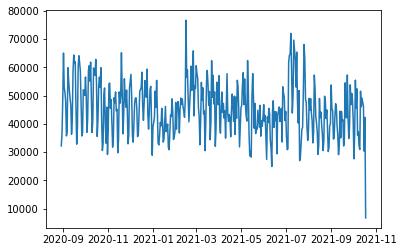

In [92]:
plt.plot(daily_visitors)

In [93]:
max(daily_visitors.daily_visitors)

76647

In [94]:
daily_visitors[daily_visitors.daily_visitors==76647]

,daily_visitors
date,
2021-02-15,76647


In [95]:
#most visited day 2021-02-15.

In [96]:
# ilk datamı buraya ekliycem. Böylece birlikte analiz yapabilicem. Daha sonra data2yi de düzenleyip ekleyeceğim ve yepyeni bir data
#elde edip analize evam edicem.Daha sonra yukarda önceden oluşturduğum data2_group dataframe ekliycem. Date kolonunu indeks olarak kullanıcam.

In [97]:
daily_visitors

,daily_visitors
date,
2020-08-29,32192
2020-08-30,36706
2020-08-31,48682
2020-09-01,65041
2020-09-02,52892
...,...
2021-10-14,47650
2021-10-15,46140
2021-10-16,30317


In [98]:
data

,pk,date,hour,bist100,usdtry,eurtry,eurusd,faiz,xau,brent
0,3,2021-04-28,17,1388.59,8.2159,9.9379,1.2096,18.08,1773.86,67.33
1,4,2021-04-29,10,1398.85,8.1710,9.9166,1.2120,18.08,1780.19,67.54
2,5,2021-04-30,9,1401.52,8.2281,9.9741,1.2117,18.08,1769.11,68.08
3,6,2021-05-03,19,1421.15,8.2649,9.9694,1.2056,17.94,1793.31,67.45
4,7,2021-05-04,10,1421.15,8.2888,9.9721,1.2027,17.94,1785.86,67.43
...,...,...,...,...,...,...,...,...,...,...
619,623,2021-10-17,9,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86
620,624,2021-10-17,12,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86
621,625,2021-10-17,15,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86
622,626,2021-10-17,18,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86


In [99]:
data1=data[["bist100","usdtry","eurusd","faiz","xau","brent","date"]]

In [100]:
data1

,bist100,usdtry,eurusd,faiz,xau,brent,date
0,1388.59,8.2159,1.2096,18.08,1773.86,67.33,2021-04-28
1,1398.85,8.1710,1.2120,18.08,1780.19,67.54,2021-04-29
2,1401.52,8.2281,1.2117,18.08,1769.11,68.08,2021-04-30
3,1421.15,8.2649,1.2056,17.94,1793.31,67.45,2021-05-03
4,1421.15,8.2888,1.2027,17.94,1785.86,67.43,2021-05-04
...,...,...,...,...,...,...,...
619,1409.56,9.2595,1.1603,18.47,1767.62,84.86,2021-10-17
620,1409.56,9.2595,1.1603,18.47,1767.62,84.86,2021-10-17
621,1409.56,9.2595,1.1603,18.47,1767.62,84.86,2021-10-17
622,1409.56,9.2595,1.1603,18.47,1767.62,84.86,2021-10-17


In [101]:
data1.set_index('date',inplace=True,drop=True)

In [102]:
data1

,bist100,usdtry,eurusd,faiz,xau,brent
date,,,,,,
2021-04-28,1388.59,8.2159,1.2096,18.08,1773.86,67.33
2021-04-29,1398.85,8.1710,1.2120,18.08,1780.19,67.54
2021-04-30,1401.52,8.2281,1.2117,18.08,1769.11,68.08
2021-05-03,1421.15,8.2649,1.2056,17.94,1793.31,67.45
2021-05-04,1421.15,8.2888,1.2027,17.94,1785.86,67.43
...,...,...,...,...,...,...
2021-10-17,1409.56,9.2595,1.1603,18.47,1767.62,84.86
2021-10-17,1409.56,9.2595,1.1603,18.47,1767.62,84.86
2021-10-17,1409.56,9.2595,1.1603,18.47,1767.62,84.86


In [103]:
# lets call our composed data as final. Now ı want to merge them.

In [104]:
final=daily_visitors.join(data1,on="date")

In [105]:
final

,daily_visitors,bist100,usdtry,eurusd,faiz,xau,brent
date,,,,,,,
2020-08-29,32192,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30,36706,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,48682,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,65041,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02,52892,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-10-17,42251,1409.56,9.2595,1.1603,18.47,1767.62,84.86
2021-10-17,42251,1409.56,9.2595,1.1603,18.47,1767.62,84.86
2021-10-17,42251,1409.56,9.2595,1.1603,18.47,1767.62,84.86


In [106]:
#now ı want to clean the na values,again.

In [107]:
final.isna().sum()

daily_visitors      0
bist100           255
usdtry            255
eurusd            255
faiz              255
xau               255
brent             255
dtype: int64

In [108]:
final.dropna(axis=0,inplace=True)

In [109]:
final.isna().sum()

daily_visitors    0
bist100           0
usdtry            0
eurusd            0
faiz              0
xau               0
brent             0
dtype: int64

In [110]:
final.head()

,daily_visitors,bist100,usdtry,eurusd,faiz,xau,brent
date,,,,,,,
2021-04-28,44793,1388.59,8.2159,1.2096,18.08,1773.86,67.33
2021-04-29,31822,1398.85,8.1710,1.2120,18.08,1780.19,67.54
2021-04-30,38358,1401.52,8.2281,1.2117,18.08,1769.11,68.08
2021-05-03,53631,1421.15,8.2649,1.2056,17.94,1793.31,67.45
2021-05-04,58082,1421.15,8.2888,1.2027,17.94,1785.86,67.43


In [111]:
final=final.join(data2_grouped,on="date")

In [112]:
final.head()

,daily_visitors,bist100,usdtry,eurusd,faiz,xau,brent,country_ABD,country_Türkiye,priority_1,priority_2,priority_3
date,,,,,,,,,,,,
2021-04-28,44793,1388.59,8.2159,1.2096,18.08,1773.86,67.33,72.0,27.0,149.0,37.0,108.0
2021-04-29,31822,1398.85,8.1710,1.2120,18.08,1780.19,67.54,48.0,43.0,106.0,48.0,119.0
2021-04-30,38358,1401.52,8.2281,1.2117,18.08,1769.11,68.08,30.0,67.0,158.0,41.0,189.0
2021-05-03,53631,1421.15,8.2649,1.2056,17.94,1793.31,67.45,23.0,28.0,63.0,8.0,78.0
2021-05-04,58082,1421.15,8.2888,1.2027,17.94,1785.86,67.43,36.0,44.0,95.0,15.0,97.0


In [113]:
final.isna().sum()

daily_visitors      0
bist100             0
usdtry              0
eurusd              0
faiz                0
xau                 0
brent               0
country_ABD        28
country_Türkiye    28
priority_1         28
priority_2         28
priority_3         28
dtype: int64

In [114]:
priority_1_per=((final.priority_1.isna().sum())/len(final.priority_1))*100

In [115]:
priority_1_per

4.487179487179487

In [116]:
#as you see the na values are just %4 of entire each columns, so ı want to drop the na rows instead of filling.

In [117]:
final.dropna(axis=0,inplace=True)

In [118]:
final.isna().sum()

daily_visitors     0
bist100            0
usdtry             0
eurusd             0
faiz               0
xau                0
brent              0
country_ABD        0
country_Türkiye    0
priority_1         0
priority_2         0
priority_3         0
dtype: int64

In [119]:
# Now we have cleaned final data which are generated by three different dataset including economic_calendar,
#economic_variables, and transactions. 

In [120]:
# I want to exploratory analysis on this final dataset.

In [121]:
#First of all,lets calculate corelation matrix and visualisation to see the relationship betwween economic events and variables.

In [122]:
# pairplot yapalım.


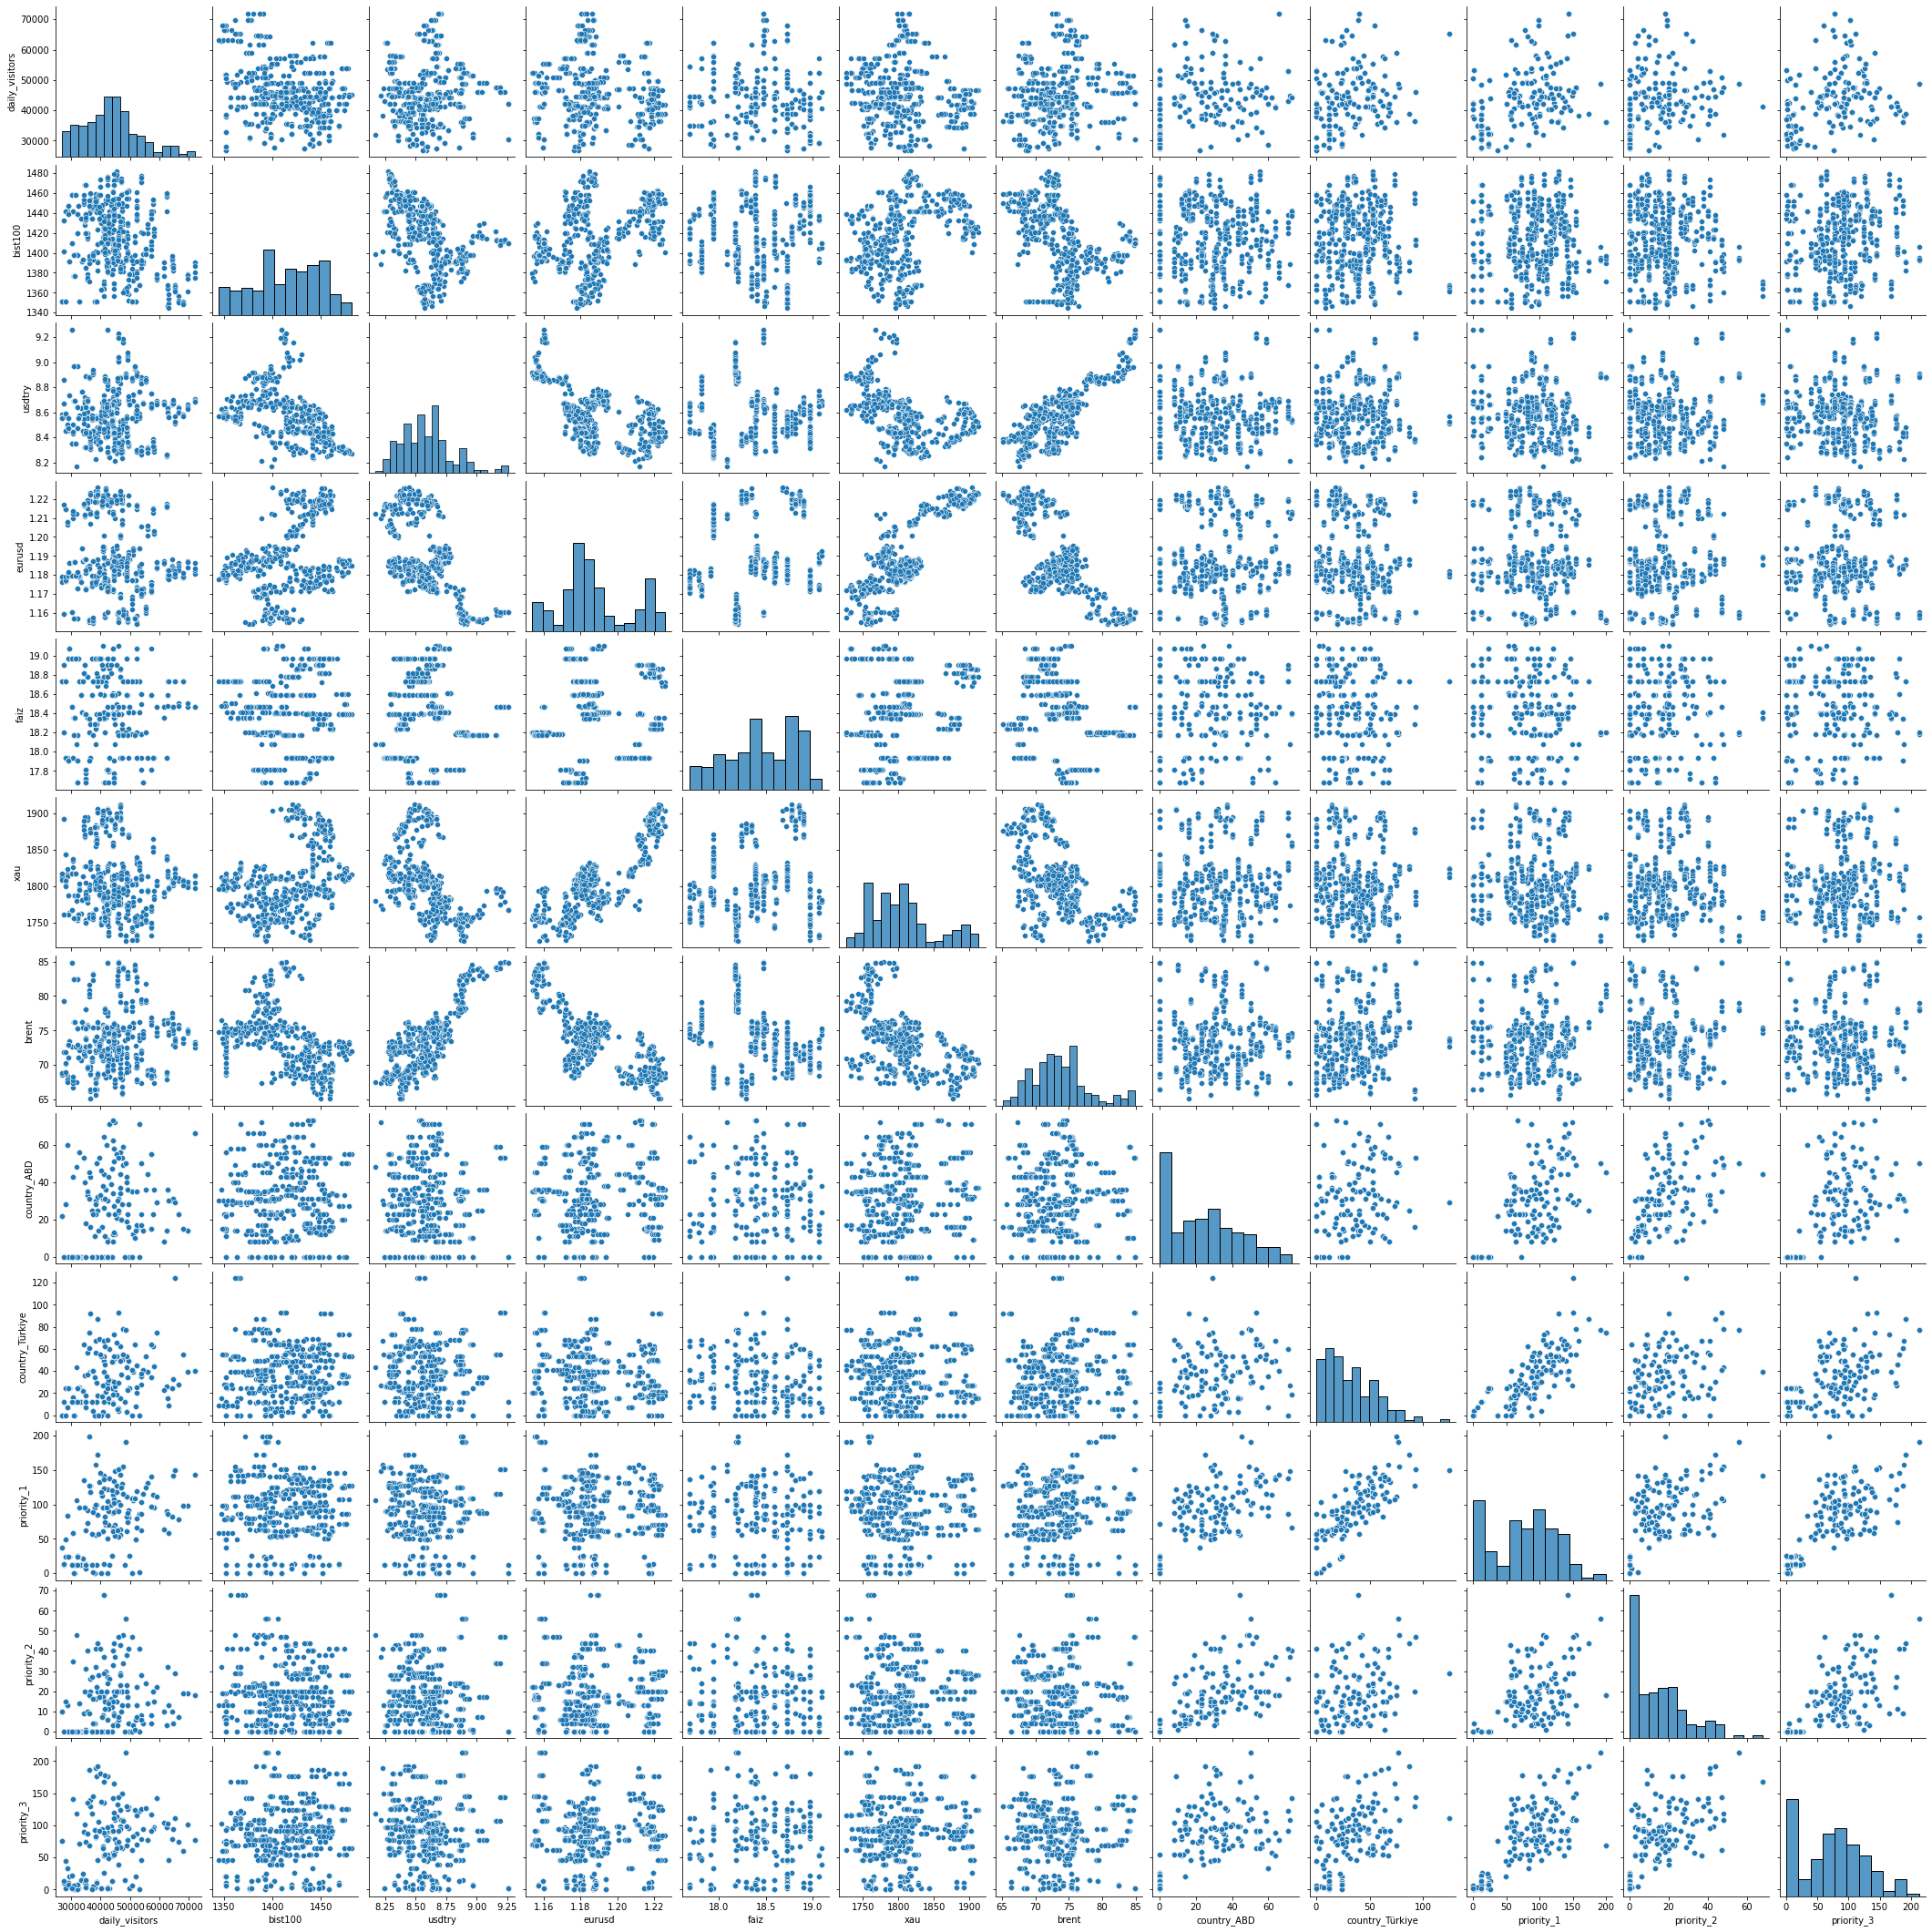

In [123]:
sns.pairplot(final)
plt.show()

In [124]:
#BİVARİATE ANALYSİS
# I want to look at the columns to see how affects the daily-visitors.

In [125]:
# daily_visitors kendi içinde dağılımına bakalım önce.

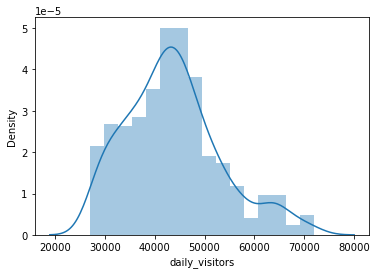

In [126]:
sns.distplot(final.daily_visitors)
plt.show()

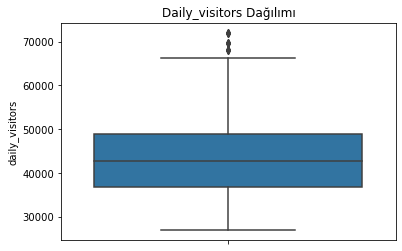

In [127]:
plt.title('Daily_visitors Dağılımı')
sns.boxplot(y=final.daily_visitors)
plt.show()

In [128]:
# As you see the distrubution of the number of daily_visitors are mostly between 40.000 and 50.000.

In [129]:
# statistics with the number of daily_visitors 

final.daily_visitors.describe()

count      596.000000
mean     43645.134228
std       9634.844193
min      26954.000000
25%      36867.250000
50%      42694.000000
75%      48904.000000
max      72007.000000
Name: daily_visitors, dtype: float64

In [130]:
#Şimdi ikili grafiklerle (pair-plot) olarak tümünü görelim:

In [131]:
final.columns

Index(['daily_visitors', 'bist100', 'usdtry', 'eurusd', 'faiz', 'xau', 'brent',
       'country_ABD', 'country_Türkiye', 'priority_1', 'priority_2',
       'priority_3'],
      dtype='object')

In [132]:
# BU TÜR GRAFİKLERDE EN FAZLA 30 KOLON İÇİN ANALİZ YAPIYOR, DOLAYISIYLA, KOLONLARIMI 30 ADET AYIRARAK HEPSİNİ ayrı inceledim.

In [133]:
cols=final.columns

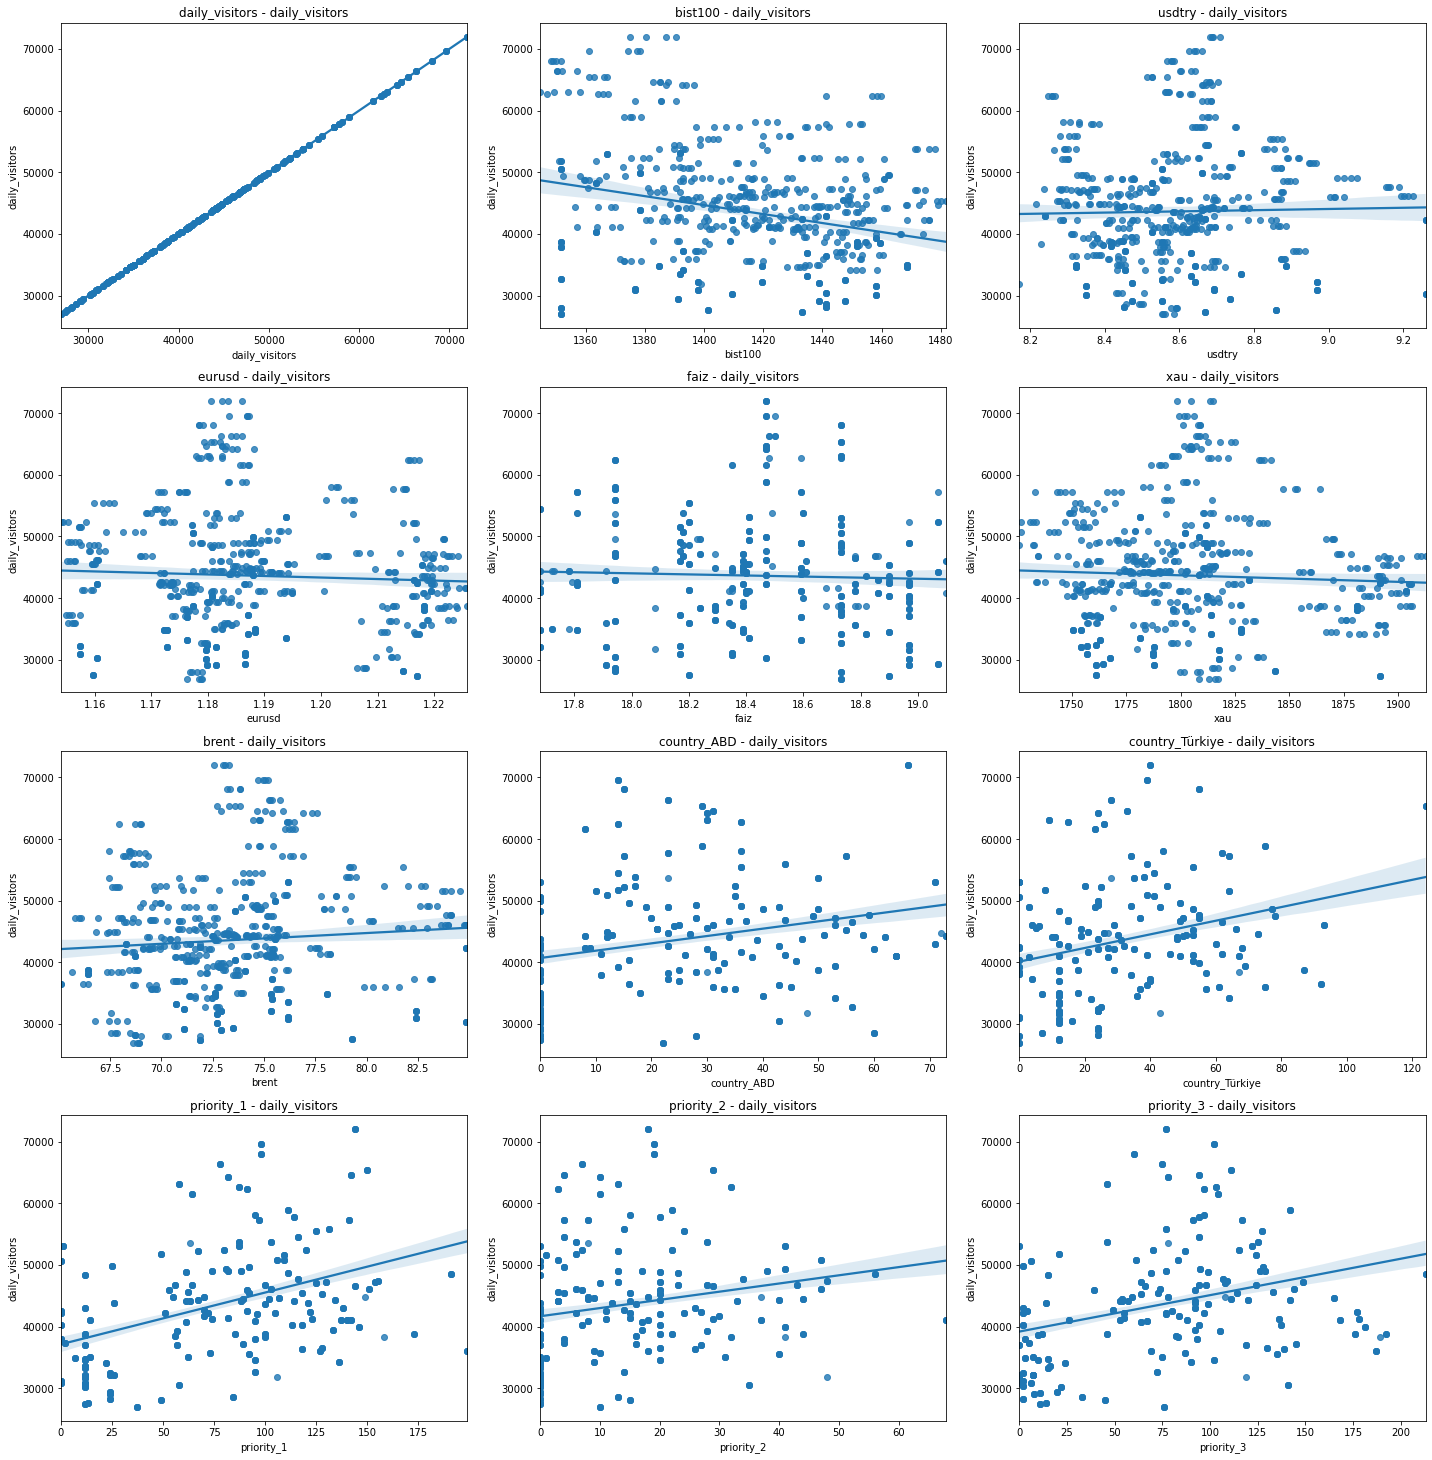

In [134]:
# regresyon doğruları ile ilişkiyi görelim

plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - daily_visitors')
    sns.regplot(x=eval('final' + '.' + cols[i]), y=final.daily_visitors)
    
plt.tight_layout()

In [135]:
corrMatrix=final.corr()

In [136]:
a

Int64Index([      40,       50,       58,       93,      124,      142,
                 217,      249,      380,      394,
            ...
            20831770, 20831772, 20831775, 20831782, 20831784, 20831789,
            20831792, 20831801, 20831802, 20831807],
           dtype='int64', length=2071467)

In [137]:
#yukarıda regresyon plot yaptım daily_visitors kolonuna göre, sonuçlar beklediğim gibi değil, çok fazla regresyon var gibi
#görünmüyor, priorityler biraz daha iyi.

In [138]:
#korelasyonlarına bakmak istedim. Orada da görüldüğü gibi ço korele değiller. 

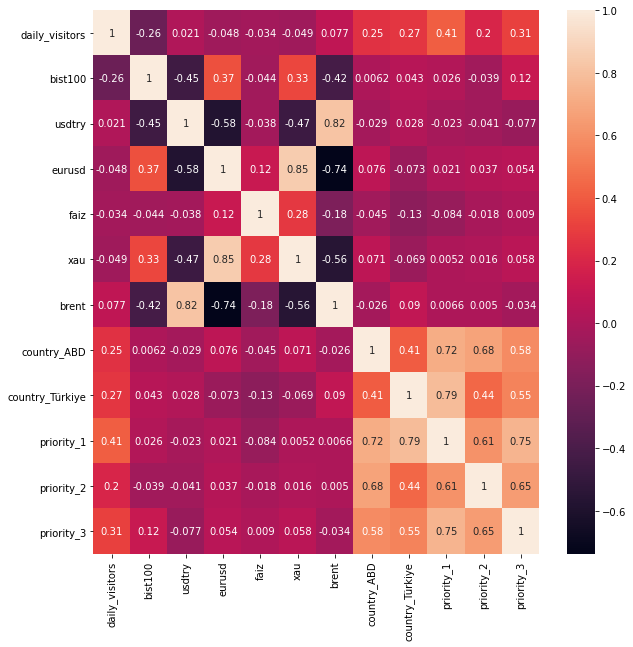

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [140]:
#r<0.2 ise çok zayıf ilişki yada korelasyon yok

#0.2-0.4 arasında ise zayıf korelasyon

#0.4-0.6 arasında ise orta şiddette korelasyon

#0.6-0.8 arasında ise yüksek korelasyon

#0.8> ise çok yüksek korelasyon olduğu yorumu yapılır.

In [141]:
# Bu sonuçlara göre daily_visitors ile sadece priority_1 değişkeni orta korelasyon yapmış.bist_100 değişkeni ile zayıf ters 
#korelasyon mevcut.priority2 vepriority_3 değişkenleri ile pozitif zayıf korelasyon mevcut. Diğer değişkenler ile korele değil.

In [ ]:
#Lineer regresyona sokmadım(parameters,daily_visitors) çünkü korelasyon çok düşük, regplotlarda 
#lineer regresyon olmadığı da açık.